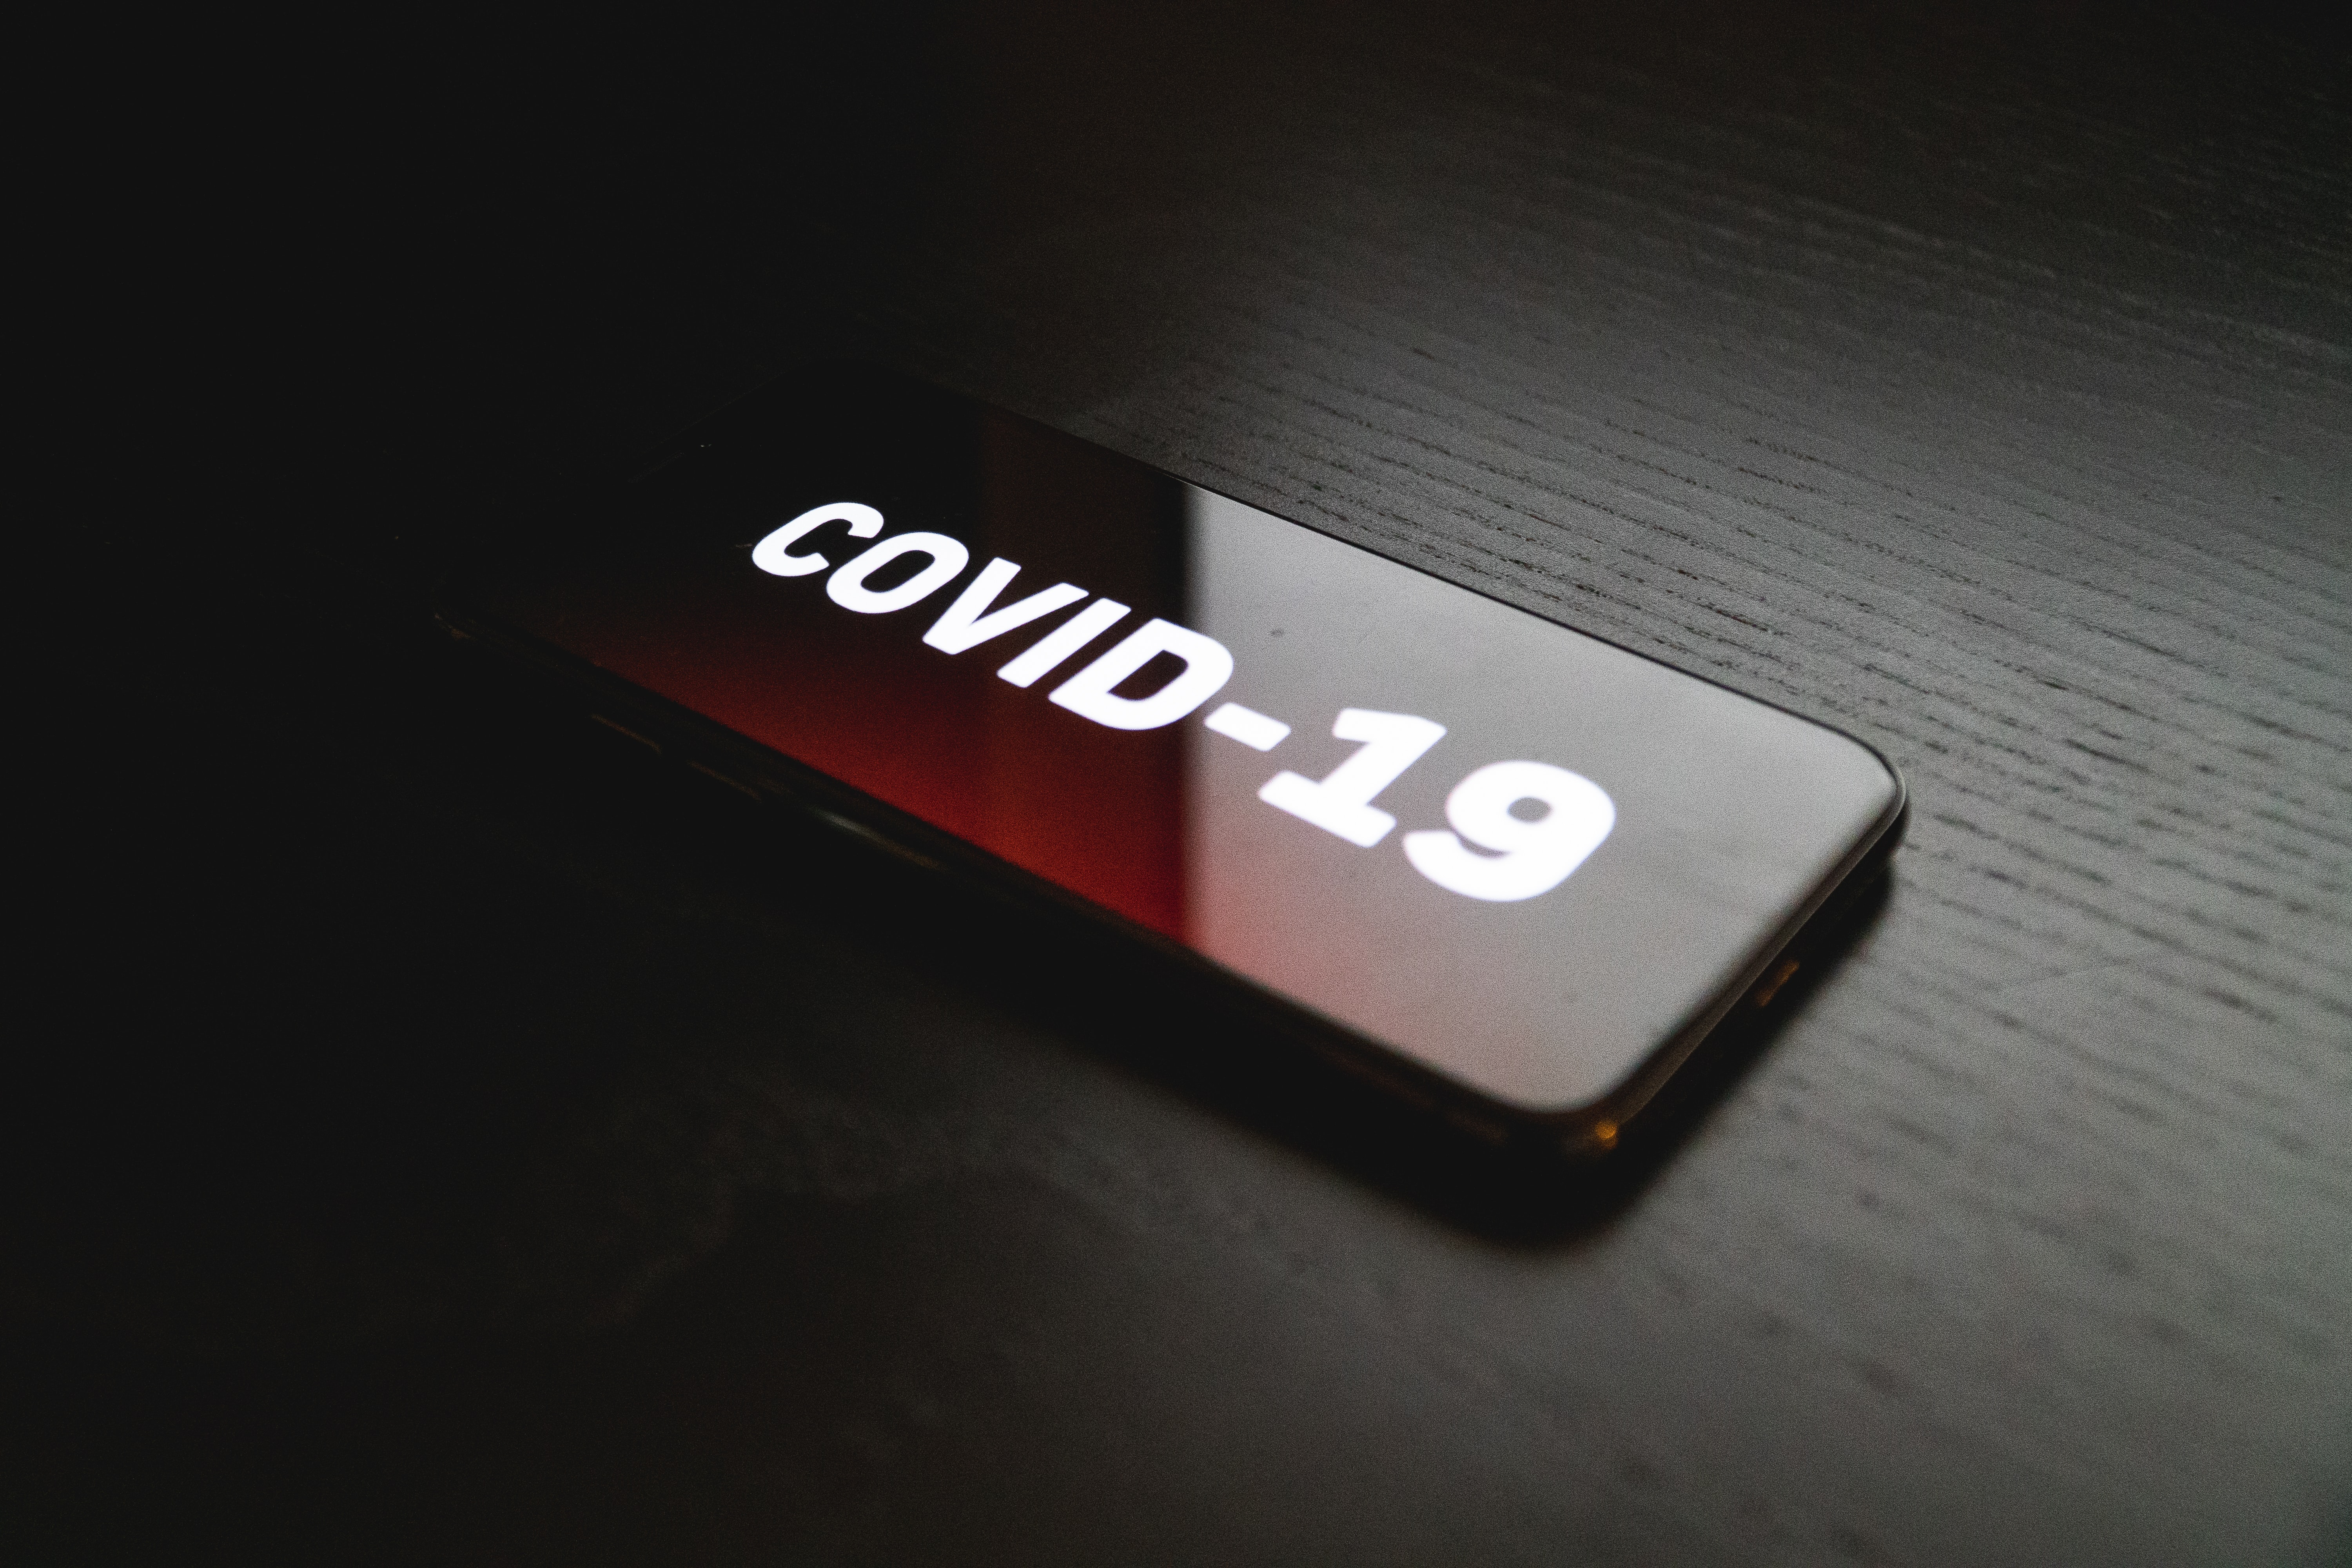

In [4]:
import os
from IPython.display import Image
# Include path for title image for notebook
Path ="Images/"
Image(filename= Path + "covid19.jpg", width=970, height=900)
# Photo by Martin Sanchez on Unsplash

In [5]:
# Packages and librairies to import
import numpy as np
import pandas as pd
from datetime import datetime
# Allows for matplotlib plotting outputs to be diplayed on below respective cell block
%matplotlib inline

# set print options of numpy floats as default format of .format() string method
np.set_printoptions(formatter={"float_kind":"{:f}".format})

In [6]:
# Load raw data into notebook as dataframe objects
raw_data_confirmed = pd.read_csv("/Users/antoniogatongay/Desktop/COVID-19-master(04:04:20)/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
raw_data_deaths = pd.read_csv("/Users/antoniogatongay/Desktop/COVID-19-master(04:04:20)/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
raw_data_recovered = pd.read_csv("/Users/antoniogatongay/Desktop/COVID-19-master(04:04:20)/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

# Examining the data resources, note that rows for globally recovered patients are less than the other dataframes
# containing by a difference of 14
print("Shape of global confirmed data: ", raw_data_confirmed.shape)
print("Shape of global deaths data: ", raw_data_deaths.shape)
print("Shape of global recovered data: ", raw_data_recovered.shape)

# Check the beginning contents of confirmed cases dataframe
raw_data_confirmed.head()

Shape of global confirmed data:  (259, 78)
Shape of global deaths data:  (259, 78)
Shape of global recovered data:  (245, 78)


Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/26/20  3/27/20  3/28/20  3/29/20  \
0        0        0        0  ...       94      110      110      120   
1        0        0        0  ...      174      186      197      212   
2        0        0        0  ...      367      409      454      511   
3        0        0        0  ...      224      267      308      334   
4        0        0        0  ...        4        4        5        7   

   3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  
0      170      174     237     273     281     299  
1      223      243     259     277     304     333  
2      584      716     847     986    1171    1251  
3      370      376     390     428     439     466  
4        7        7       8       8       8      10  

[5 rows x 78 columns]

In [7]:
# Unpivoting data in order to simplify value aggregations
raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name=["Date"])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name=["Date"])
raw_data_recovered2 = pd.melt(raw_data_recovered, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name=["Date"])

raw_data_confirmed2.head()
raw_data_deaths2.head()
raw_data_recovered2.head()

Province/State Country/Region      Lat     Long     Date  value
0            NaN    Afghanistan  33.0000  65.0000  1/22/20      0
1            NaN        Albania  41.1533  20.1683  1/22/20      0
2            NaN        Algeria  28.0339   1.6596  1/22/20      0
3            NaN        Andorra  42.5063   1.5218  1/22/20      0
4            NaN         Angola -11.2027  17.8739  1/22/20      0

In [8]:
# This section may cause errors !!!
# Reformatting date values may be necessary!!!
raw_data_confirmed2["Date"] = pd.to_datetime(raw_data_confirmed2["Date"])
raw_data_deaths2["Date"] = pd.to_datetime(raw_data_deaths2["Date"])
raw_data_recovered2["Date"] = pd.to_datetime(raw_data_recovered2["Date"])

print("Shape of new confirmed dataframe: ", raw_data_confirmed2.shape)
print("Shape of new deaths dataframe: ", raw_data_deaths2.shape)
print("Shape of new recovered dataframe: ", raw_data_recovered2.shape)

Shape of new confirmed dataframe:  (19166, 6)
Shape of new deaths dataframe:  (19166, 6)
Shape of new recovered dataframe:  (18130, 6)


In [9]:
# Number of rows have multiplied by 74 from testing dataset from 4/4/20 
# Renaming ambiguous value columns
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace("value", "Confirmed")
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace("value", "Deaths")
raw_data_recovered2.columns = raw_data_recovered2.columns.str.replace("value" ,"Recovered")

In [10]:
# Looking to see if there are any null values
print(' Confirmed \n', raw_data_confirmed2.isnull().sum())
print("-----")
print(' Deaths \n', raw_data_deaths2.isnull().sum())
print("-----")
print(' Recovered \n', raw_data_recovered2.isnull().sum())

 Confirmed 
 Province/State    13172
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
dtype: int64
-----
 Deaths 
 Province/State    13172
Country/Region        0
Lat                   0
Long                  0
Date                  0
Deaths                0
dtype: int64
-----
 Recovered 
 Province/State    13246
Country/Region        0
Lat                   0
Long                  0
Date                  0
Recovered             0
dtype: int64


In [11]:
# From testing data, there is 74 more null values within Recovered, meaning theres is 1 extra row containing Null
# values before melt/unpivoting the data

# Fill in empty cells in 'Province/State' column with value in 'Country/Region'
raw_data_confirmed2["Province/State"].fillna(raw_data_confirmed2["Country/Region"], inplace = True)
raw_data_deaths2["Province/State"].fillna(raw_data_deaths2["Country/Region"], inplace = True)
raw_data_recovered2["Province/State"].fillna(raw_data_recovered2["Country/Region"], inplace = True)

In [12]:
# Check for any null values one last time
print(' Confirmed \n',raw_data_confirmed2.isnull().sum())
print("-----")
print(' Deaths \n',raw_data_deaths2.isnull().sum())
print("-----")
print(' Recovered \n', raw_data_recovered2.isnull().sum())

 Confirmed 
 Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64
-----
 Deaths 
 Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Deaths            0
dtype: int64
-----
 Recovered 
 Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64


In [13]:
# Round Lat and Long values to 3 decimal places to avoid entry discrepencies when joining
# 4 locations share this problem when using 4/4/20 dataset

raw_data_confirmed2["Lat"].update(raw_data_confirmed2["Lat"].round(3).astype(np.float64))
raw_data_deaths2["Lat"].update(raw_data_deaths2["Lat"].round(3).astype(np.float64))
raw_data_recovered2["Lat"].update(raw_data_recovered2["Lat"].round(3).astype(np.float64))

raw_data_confirmed2["Long"].update(raw_data_confirmed2["Long"].round(3).astype(np.float64))
raw_data_deaths2["Long"].update(raw_data_deaths2["Long"].round(3).astype(np.float64))
raw_data_recovered2["Long"].update(raw_data_recovered2["Long"].round(3).astype(np.float64))

# Now perform full joins of all dataframes

# Confirmed dataframe with Deaths dataframe first
full_join = raw_data_confirmed2.merge(raw_data_deaths2[["Province/State","Country/Region","Lat", "Long","Date",
                                                        "Deaths"]],
                                     how = "outer",
                                     on = ["Province/State","Country/Region","Lat","Long","Date"])

print("Shape of first join:", full_join.shape)

# Finish with outer join to Recovered dataframe

# Since cell block initially defines full_join dataframe by merge of "confirm" and "deaths", there is no concern
# in ruining full_join dataframe by merging full_join dataframe to "recovered" repeatedly when cell block runs more
# than once

full_join = full_join.merge(raw_data_recovered2[["Province/State", "Country/Region", "Lat", "Long","Date",
                                                 "Recovered"]],
                           how = "outer",
                           on = ["Province/State", "Country/Region", "Lat", "Long", "Date"])

print("Shape of second join:", full_join.shape)

full_join.head()
# Note that the rows have increased and that the original recovered dataframe's shape was less than confirmed and
# deaths 

Shape of first join: (19166, 7)
Shape of second join: (19240, 8)


Province/State Country/Region     Lat    Long       Date  Confirmed  Deaths  \
0    Afghanistan    Afghanistan  33.000  65.000 2020-01-22        0.0     0.0   
1        Albania        Albania  41.153  20.168 2020-01-22        0.0     0.0   
2        Algeria        Algeria  28.034   1.660 2020-01-22        0.0     0.0   
3        Andorra        Andorra  42.506   1.522 2020-01-22        0.0     0.0   
4         Angola         Angola -11.203  17.874 2020-01-22        0.0     0.0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [14]:
# Check if there are any null values in the new dataframe (especially long and lat for future geoplotting)

full_join.isnull().sum()

Province/State       0
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed           74
Deaths              74
Recovered         1110
dtype: int64

In [15]:
# From the John Hopkins data from up 'til April 4th, 2020 there are 74 entries that are null in lat, long, confirmed,
# and deaths

# pd.melt() adds 74 additional rows per original row

# Row 38 ("", Canada) within the original Recovered dataframe DNE within the original Confirmed and Deaths dataframes 
# causing 74 nulls in confirmed, and deaths columns from joins

# Additionally, there are 14 less rows for the original Recovered dataframe as to Confirmed and Deaths.
# Including the row mentioned above, this causes 15 rows from the original Confirmed and Deaths to not be 
# matched/joined causing 1110 null values within Recovered column.
# Note: Recovered contains 1110 null values and 1110/74 = 15

testdf = full_join[["Province/State", "Country/Region","Lat","Long","Date","Confirmed","Recovered","Deaths"]]
# isnull() returns table-like array of bool where it is True if value in cell is Null/NaN/empty, and .any(axis=1)
# checks rows for any True/non-zero values from the bool array while reducing columns to create Series of bool 
nulldf = testdf[testdf.isnull().any(axis=1)]
# Nulldf is dataframe containing all rows that have null values
print(nulldf.shape)
nulldf.head()

(1184, 8)


Province/State Country/Region     Lat     Long       Date  Confirmed  \
35           Alberta         Canada  53.933 -116.576 2020-01-22        0.0   
36  British Columbia         Canada  49.283 -123.121 2020-01-22        0.0   
37    Grand Princess         Canada  37.649 -122.666 2020-01-22        0.0   
38          Manitoba         Canada  53.761  -98.814 2020-01-22        0.0   
39     New Brunswick         Canada  46.565  -66.462 2020-01-22        0.0   

    Recovered  Deaths  
35        NaN     0.0  
36        NaN     0.0  
37        NaN     0.0  
38        NaN     0.0  
39        NaN     0.0

In [16]:
# Add new column of Month and Year
full_join["Month-Year"] = full_join["Date"].dt.strftime('%b-%Y')
full_join.head()

Province/State Country/Region     Lat    Long       Date  Confirmed  Deaths  \
0    Afghanistan    Afghanistan  33.000  65.000 2020-01-22        0.0     0.0   
1        Albania        Albania  41.153  20.168 2020-01-22        0.0     0.0   
2        Algeria        Algeria  28.034   1.660 2020-01-22        0.0     0.0   
3        Andorra        Andorra  42.506   1.522 2020-01-22        0.0     0.0   
4         Angola         Angola -11.203  17.874 2020-01-22        0.0     0.0   

   Recovered Month-Year  
0        0.0   Jan-2020  
1        0.0   Jan-2020  
2        0.0   Jan-2020  
3        0.0   Jan-2020  
4        0.0   Jan-2020

In [17]:
# Test to filter data of Anhui by days
# New df with Anhui data
test = full_join[full_join['Province/State'] == 'Anhui']

# Create copy of the same data
full_join2 = test.copy()
full_join2.head()

Province/State Country/Region     Lat     Long       Date  Confirmed  \
49            Anhui          China  31.826  117.226 2020-01-22        1.0   
308           Anhui          China  31.826  117.226 2020-01-23        9.0   
567           Anhui          China  31.826  117.226 2020-01-24       15.0   
826           Anhui          China  31.826  117.226 2020-01-25       39.0   
1085          Anhui          China  31.826  117.226 2020-01-26       60.0   

      Deaths  Recovered Month-Year  
49       0.0        0.0   Jan-2020  
308      0.0        0.0   Jan-2020  
567      0.0        0.0   Jan-2020  
826      0.0        0.0   Jan-2020  
1085     0.0        0.0   Jan-2020

In [18]:
# new date - 1 columns
# Dates shifted one day ahead to reference the day before
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed':'Confirmed - 1', 'Deaths' : 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date' : 'Date Minus 1'}, inplace=True)

#Join the two dataframes along test's Date and full_join2's Date - 1
full_join3 = test.merge(full_join2[['Province/State', 'Country/Region', 'Confirmed - 1', 'Deaths - 1',
                                   'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'outer',
                       left_on = ['Province/State', 'Country/Region', 'Date'],
                       right_on = ['Province/State','Country/Region', 'Date - 1'])
# Preview of modified DF with shifted dates
full_join2.head()

Province/State Country/Region     Lat     Long Date Minus 1  \
49            Anhui          China  31.826  117.226   2020-01-22   
308           Anhui          China  31.826  117.226   2020-01-23   
567           Anhui          China  31.826  117.226   2020-01-24   
826           Anhui          China  31.826  117.226   2020-01-25   
1085          Anhui          China  31.826  117.226   2020-01-26   

      Confirmed - 1  Deaths - 1  Recovered - 1 Month-Year   Date - 1  
49              1.0         0.0            0.0   Jan-2020 2020-01-23  
308             9.0         0.0            0.0   Jan-2020 2020-01-24  
567            15.0         0.0            0.0   Jan-2020 2020-01-25  
826            39.0         0.0            0.0   Jan-2020 2020-01-26  
1085           60.0         0.0            0.0   Jan-2020 2020-01-27

In [19]:
# Preview of merged DF with adjacent date data
full_join3.head()

Province/State Country/Region     Lat     Long       Date  Confirmed  \
0          Anhui          China  31.826  117.226 2020-01-22        1.0   
1          Anhui          China  31.826  117.226 2020-01-23        9.0   
2          Anhui          China  31.826  117.226 2020-01-24       15.0   
3          Anhui          China  31.826  117.226 2020-01-25       39.0   
4          Anhui          China  31.826  117.226 2020-01-26       60.0   

   Deaths  Recovered Month-Year  Confirmed - 1  Deaths - 1  Recovered - 1  \
0     0.0        0.0   Jan-2020            NaN         NaN            NaN   
1     0.0        0.0   Jan-2020            1.0         0.0            0.0   
2     0.0        0.0   Jan-2020            9.0         0.0            0.0   
3     0.0        0.0   Jan-2020           15.0         0.0            0.0   
4     0.0        0.0   Jan-2020           39.0         0.0            0.0   

    Date - 1 Date Minus 1  
0        NaT          NaT  
1 2020-01-23   2020-01-22  
2 2020-01-24   2020-01-23  
3 2020-01-25   2020-01-24  
4 2020-01-26   2020-01-25

In [20]:
# Added daily confirmed cases
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3.head()

Province/State Country/Region     Lat     Long       Date  Confirmed  \
0          Anhui          China  31.826  117.226 2020-01-22        1.0   
1          Anhui          China  31.826  117.226 2020-01-23        9.0   
2          Anhui          China  31.826  117.226 2020-01-24       15.0   
3          Anhui          China  31.826  117.226 2020-01-25       39.0   
4          Anhui          China  31.826  117.226 2020-01-26       60.0   

   Deaths  Recovered Month-Year  Confirmed - 1  Deaths - 1  Recovered - 1  \
0     0.0        0.0   Jan-2020            NaN         NaN            NaN   
1     0.0        0.0   Jan-2020            1.0         0.0            0.0   
2     0.0        0.0   Jan-2020            9.0         0.0            0.0   
3     0.0        0.0   Jan-2020           15.0         0.0            0.0   
4     0.0        0.0   Jan-2020           39.0         0.0            0.0   

    Date - 1 Date Minus 1  Confirmed Daily  
0        NaT          NaT              NaN  
1 2020-01-23   2020-01-22              8.0  
2 2020-01-24   2020-01-23              6.0  
3 2020-01-25   2020-01-24             24.0  
4 2020-01-26   2020-01-25             21.0

In [21]:
# Next apply to entire data set

# Reassigning full_join2 to a copy of unaltered fully joined dataframe
full_join2 = full_join.copy()

# Applying the date - 1 column
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns = {'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace = True)

# Join the two entire datasets of the original full join and it's - 1 day altered form
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region', 'Confirmed - 1', 'Deaths - 1',
                                        'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                            left_on = ['Province/State', 'Country/Region', 'Date'],
                            right_on = ['Province/State', 'Country/Region', 'Date - 1'])

# Checked 500 rows to ensure full_join2's "- 1" column values were were not fully empty/null from final join
full_join3.head(500)

Province/State          Country/Region     Lat     Long  \
0                     Afghanistan             Afghanistan  33.000   65.000   
1                         Albania                 Albania  41.153   20.168   
2                         Algeria                 Algeria  28.034    1.660   
3                         Andorra                 Andorra  42.506    1.522   
4                          Angola                  Angola -11.203   17.874   
5             Antigua and Barbuda     Antigua and Barbuda  17.061  -61.796   
6                       Argentina               Argentina -38.416  -63.617   
7                         Armenia                 Armenia  40.069   45.038   
8    Australian Capital Territory               Australia -35.474  149.012   
9                 New South Wales               Australia -33.869  151.209   
10             Northern Territory               Australia -12.463  130.846   
11                     Queensland               Australia -28.017  153.400   
12                South Australia               Australia -34.928  138.601   
13                       Tasmania               Australia -41.454  145.971   
14                       Victoria               Australia -37.814  144.963   
15              Western Australia               Australia -31.950  115.860   
16                        Austria                 Austria  47.516   14.550   
17                     Azerbaijan              Azerbaijan  40.143   47.577   
18                        Bahamas                 Bahamas  25.034  -77.396   
19                        Bahrain                 Bahrain  26.028   50.550   
20                     Bangladesh              Bangladesh  23.685   90.356   
21                       Barbados                Barbados  13.194  -59.543   
22                        Belarus                 Belarus  53.710   27.953   
23                        Belgium                 Belgium  50.833    4.000   
24                          Benin                   Benin   9.308    2.316   
25                         Bhutan                  Bhutan  27.514   90.434   
26                        Bolivia                 Bolivia -16.290  -63.589   
27         Bosnia and Herzegovina  Bosnia and Herzegovina  43.916   17.679   
28                         Brazil                  Brazil -14.235  -51.925   
29                         Brunei                  Brunei   4.535  114.728   
..                            ...                     ...     ...      ...   
470           Trinidad and Tobago     Trinidad and Tobago  10.692  -61.222   
471                       Tunisia                 Tunisia  34.000    9.000   
472                        Turkey                  Turkey  38.964   35.243   
473                        Uganda                  Uganda   1.000   32.000   
474                       Ukraine                 Ukraine  48.379   31.166   
475          United Arab Emirates    United Arab Emirates  24.000   54.000   
476                       Bermuda          United Kingdom  32.308  -64.750   
477                Cayman Islands          United Kingdom  19.313  -81.255   
478               Channel Islands          United Kingdom  49.372   -2.364   
479                     Gibraltar          United Kingdom  36.141   -5.354   
480                   Isle of Man          United Kingdom  54.236   -4.548   
481                    Montserrat          United Kingdom  16.742  -62.187   
482                United Kingdom          United Kingdom  55.378   -3.436   
483                       Uruguay                 Uruguay -32.523  -55.766   
484                            US                      US  37.090  -95.713   
485                    Uzbekistan              Uzbekistan  41.378   64.585   
486                     Venezuela               Venezuela   6.424  -66.590   
487                       Vietnam                 Vietnam  16.000  108.000   
488                        Zambia                  Zambia -15.417   28.283   
489                      Zimbabwe        

In [22]:
full_join3.shape

(19240, 14)

In [23]:
# Calculations for the daily deltas
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

full_join3.head()

Province/State Country/Region     Lat    Long       Date  Confirmed  Deaths  \
0    Afghanistan    Afghanistan  33.000  65.000 2020-01-22        0.0     0.0   
1        Albania        Albania  41.153  20.168 2020-01-22        0.0     0.0   
2        Algeria        Algeria  28.034   1.660 2020-01-22        0.0     0.0   
3        Andorra        Andorra  42.506   1.522 2020-01-22        0.0     0.0   
4         Angola         Angola -11.203  17.874 2020-01-22        0.0     0.0   

   Recovered Month-Year  Confirmed - 1  Deaths - 1  Recovered - 1 Date - 1  \
0        0.0   Jan-2020            NaN         NaN            NaN      NaT   
1        0.0   Jan-2020            NaN         NaN            NaN      NaT   
2        0.0   Jan-2020            NaN         NaN            NaN      NaT   
3        0.0   Jan-2020            NaN         NaN            NaN      NaT   
4        0.0   Jan-2020            NaN         NaN            NaN      NaT   

  Date Minus 1  Confirmed Daily  Deaths Daily  Recovered Daily  
0          NaT              NaN           NaN              NaN  
1          NaT              NaN           NaN              NaN  
2          NaT              NaN           NaN              NaN  
3          NaT              NaN           NaN              NaN  
4          NaT              NaN           NaN              NaN

In [24]:
# 3 new columns added, with no addition of rows
full_join3.shape

(19240, 17)

In [25]:
# Filling the calculations for first day records since there are no previous entries to compare with
full_join3.loc[full_join3['Date'] == '2020-01-22', 'Confirmed Daily'] = full_join3['Confirmed']
full_join3.loc[full_join3['Date'] == '2020-01-22', 'Deaths Daily'] = full_join3['Deaths']
full_join3.loc[full_join3['Date'] == '2020-01-22', 'Recovered Daily'] = full_join3['Recovered']
full_join3.head()

Province/State Country/Region     Lat    Long       Date  Confirmed  Deaths  \
0    Afghanistan    Afghanistan  33.000  65.000 2020-01-22        0.0     0.0   
1        Albania        Albania  41.153  20.168 2020-01-22        0.0     0.0   
2        Algeria        Algeria  28.034   1.660 2020-01-22        0.0     0.0   
3        Andorra        Andorra  42.506   1.522 2020-01-22        0.0     0.0   
4         Angola         Angola -11.203  17.874 2020-01-22        0.0     0.0   

   Recovered Month-Year  Confirmed - 1  Deaths - 1  Recovered - 1 Date - 1  \
0        0.0   Jan-2020            NaN         NaN            NaN      NaT   
1        0.0   Jan-2020            NaN         NaN            NaN      NaT   
2        0.0   Jan-2020            NaN         NaN            NaN      NaT   
3        0.0   Jan-2020            NaN         NaN            NaN      NaT   
4        0.0   Jan-2020            NaN         NaN            NaN      NaT   

  Date Minus 1  Confirmed Daily  Deaths Daily  Recovered Daily  
0          NaT              0.0           0.0              0.0  
1          NaT              0.0           0.0              0.0  
2          NaT              0.0           0.0              0.0  
3          NaT              0.0           0.0              0.0  
4          NaT              0.0           0.0              0.0

In [26]:
# Deleting temporary columns used for daily calculations and comparisons
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']

full_join3.head()

Province/State Country/Region     Lat    Long       Date  Confirmed  Deaths  \
0    Afghanistan    Afghanistan  33.000  65.000 2020-01-22        0.0     0.0   
1        Albania        Albania  41.153  20.168 2020-01-22        0.0     0.0   
2        Algeria        Algeria  28.034   1.660 2020-01-22        0.0     0.0   
3        Andorra        Andorra  42.506   1.522 2020-01-22        0.0     0.0   
4         Angola         Angola -11.203  17.874 2020-01-22        0.0     0.0   

   Recovered Month-Year  Confirmed Daily  Deaths Daily  Recovered Daily  
0        0.0   Jan-2020              0.0           0.0              0.0  
1        0.0   Jan-2020              0.0           0.0              0.0  
2        0.0   Jan-2020              0.0           0.0              0.0  
3        0.0   Jan-2020              0.0           0.0              0.0  
4        0.0   Jan-2020              0.0           0.0              0.0

In [30]:
# Export data to csv
# Setting destination path
path = "/Users/antoniogatongay/Desktop/Learning/Bootcamp Assignments/COVID-19_Dashboard/PowerBI"

# Changing my current work directory
os.chdir(path)

full_join3.to_csv('CoronaVirus PowerBI Raw', sep = '\t')